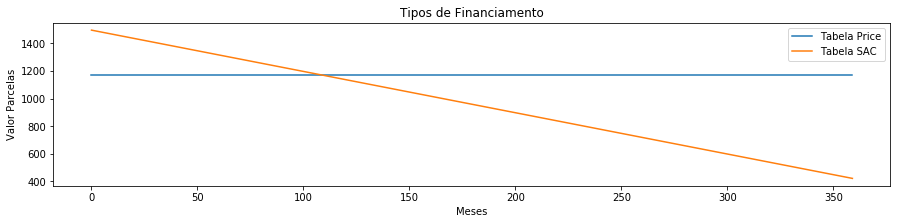

Valor total das tabelas:
Tabela Price -> R$ 420.582,89
Tabela SAC   -> R$ 344.940,00


Primeiro valor das tabelas:
Tabela Price -> R$ 1.168,29
Tabela SAC   -> R$ 1.496,67


Último valor das tabelas:
Tabela Price -> R$ 1.168,29
Tabela SAC   -> R$ 419,67


Amortizações:
Tabela Price -> R$ 88,29
Tabela SAC   -> R$ 416,67

Tabela SAC detalhada:
+-----+-------------+---------------+-------------+
| Mês |    Valor    |   Valor Pago  |    Juros    |
+-----+-------------+---------------+-------------+
|  1  | R$ 1.496,67 |  R$ 1.496,67  | R$ 1.080,00 |
|  2  | R$ 1.493,67 |  R$ 2.990,33  | R$ 1.077,00 |
|  3  | R$ 1.490,67 |  R$ 4.481,00  | R$ 1.074,00 |
|  4  | R$ 1.487,67 |  R$ 5.968,67  | R$ 1.071,00 |
|  5  | R$ 1.484,67 |  R$ 7.453,33  | R$ 1.068,00 |
|  6  | R$ 1.481,67 |  R$ 8.935,00  | R$ 1.065,00 |
|  7  | R$ 1.478,67 |  R$ 10.413,67 | R$ 1.062,00 |
|  8  | R$ 1.475,67 |  R$ 11.889,33 | R$ 1.059,00 |
|  9  | R$ 1.472,67 |  R$ 13.362,00 | R$ 1.056,00 |
|  10 | R$ 1.469,67 |  R$ 14.831,

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from money import Money

numParcelas            = 360
valorFinanciado        = 150000
jurosSobreSaldoDevedor = 0.72

def financiamentoTabelaSAC(numParcelas, valorFinanciado, jurosSobreSaldoDevedor):

    jurosSobreSaldoDevedor = jurosSobreSaldoDevedor / 100.0
    amortizacao = valorFinanciado/numParcelas

    lst_parcela     = []
    lst_juros       = []
    lst_amortizacao = []

    for i in range(numParcelas):
        if i == 0:
            jurosFinal = valorFinanciado * jurosSobreSaldoDevedor
            parcela    = amortizacao + jurosFinal

            lst_parcela.append(parcela)
            lst_juros.append(jurosFinal)
            lst_amortizacao.append(parcela - jurosFinal)
        else:
            jurosFinal = (valorFinanciado - i * amortizacao) * jurosSobreSaldoDevedor
            parcela    = amortizacao + jurosFinal

            lst_parcela.append(parcela)
            lst_juros.append(jurosFinal)
            lst_amortizacao.append(lst_parcela[i] - jurosFinal)
            
    return lst_parcela, lst_amortizacao, lst_juros

def financiamentoTabelaPrice(numParcelas, valorFinanciado, jurosSobreSaldoDevedor):

    jurosSobreSaldoDevedor = jurosSobreSaldoDevedor / 100.0
    parcela = valorFinanciado * ((pow(1 + jurosSobreSaldoDevedor,numParcelas) * jurosSobreSaldoDevedor) / (pow(1 + jurosSobreSaldoDevedor,numParcelas) - 1) )

    lst_parcelas    = []
    lst_juros       = []
    lst_amortizacao = []

    for i in range(numParcelas):
        lst_parcelas.append(parcela)
        amortizacao = parcela - valorFinanciado * jurosSobreSaldoDevedor

        if i == 0:
            lst_amortizacao.append(amortizacao)
            lst_juros.append(valorFinanciado * jurosSobreSaldoDevedor)
        else:
            jurosParcial = jurosSobreSaldoDevedor * lst_amortizacao[i-1]
            amortizacao  = lst_amortizacao[i-1] + jurosParcial
            jurosFinal   = lst_juros[i-1] - jurosParcial
            
            lst_amortizacao.append(amortizacao)
            lst_juros.append(jurosFinal)

    return lst_parcelas, lst_amortizacao, lst_juros
    
    
def changeCurrency(value):
    money = Money(value,'BRL').format('pt_BR')
    
    return money

def criarTabela(tipo):
    tabela = PrettyTable()
    
    if tipo == "price":
        parcelas, amortizacao, juros = financiamentoTabelaPrice(numParcelas, valorFinanciado, jurosSobreSaldoDevedor)
    elif tipo == "sac":
        parcelas, amortizacao, juros = financiamentoTabelaSAC(numParcelas, valorFinanciado, jurosSobreSaldoDevedor)
    else:
        print("Tipo de tabela inválido")
        exit(1)
    
    tabela.field_names = ["Mês","Valor","Valor Pago","Juros"]
    
    sumParcelas    = 0.0
    
    for i in range(numParcelas):
        sumParcelas    += parcelas[i]
        
        tabela.add_row([
            i+1, 
            changeCurrency(parcelas[i]), 
            changeCurrency(sumParcelas),
            changeCurrency(juros[i])
        ])
        
    return tabela, changeCurrency(sumParcelas), changeCurrency(parcelas[0]), changeCurrency(parcelas[-1])


if __name__ == "__main__":
    
    parcelasPrice, amortizacaoPrice, jurosPrice = financiamentoTabelaPrice(numParcelas, valorFinanciado, jurosSobreSaldoDevedor)
    parcelasSAC, amortizacaoSAC, jurosSAC = financiamentoTabelaSAC(numParcelas, valorFinanciado, jurosSobreSaldoDevedor)
    
    plt.xlabel('Meses')
    plt.ylabel('Valor Parcelas')
    plt.title('Tipos de Financiamento')
    plt.plot(parcelasPrice)
    plt.plot(parcelasSAC)
    plt.rcParams['figure.figsize'] = (15,3)
    plt.legend(["Tabela Price","Tabela SAC"])
    plt.show()
    
    tabelaSAC, sumParcelasSAC, primeiroValorSAC, ultimoValorSAC = criarTabela("sac")
    tabelaPrice, sumParcelasPrice, primeiroValorPrice, ultimoValorPrice = criarTabela("price")
    
    print("Valor total das tabelas:\nTabela Price -> %s\nTabela SAC   -> %s" %(sumParcelasPrice,sumParcelasSAC))
    
    print("\n\nPrimeiro valor das tabelas:\nTabela Price -> %s\nTabela SAC   -> %s" %(primeiroValorPrice,primeiroValorSAC))
    print("\n\nÚltimo valor das tabelas:\nTabela Price -> %s\nTabela SAC   -> %s" %(ultimoValorPrice,ultimoValorSAC))
    
    print("\n\nAmortizações:\nTabela Price -> %s\nTabela SAC   -> %s" %(changeCurrency(amortizacaoPrice[0]),changeCurrency(amortizacaoSAC[0])))

    
    print("\nTabela SAC detalhada:")
    print(tabelaSAC)
    print("\n\nTabela Pricedetalhada:")
    print(tabelaPrice)